#Descrição

**Passos do desafio:**
1. análise da consistência dos dados e análise estatística descritiva
2. gráficos com storytelling
3. formular hipótese estatística
4. identificar o problema a ser resolvido
5. construir modelo preditivo
6. validar o modelo

Informações sobre a base:


#1. Análise da consistência dos dados e análise estatística descritiva

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("Desafio_HR_Abandono.csv", sep=";", decimal=".")
df

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,"0,4","0,57",151,3,0,1,0,low,2,support
14995,14996,"0,37","0,48",160,3,0,1,0,low,2,support
14996,14997,"0,37","0,53",143,3,0,1,0,low,2,support
14997,14998,"0,11","0,96",280,4,0,1,0,low,6,support


In [32]:
df.shape

(14999, 11)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [34]:
#trocar vírgula por ponto pra poder transformar de string pra float:

df['satisfaction_level'] = df["satisfaction_level"].str.replace(",", ".")

In [35]:
#pra mudar tipo da coluna pra "float":

df['satisfaction_level'] = df['satisfaction_level'].astype(float)
print(df.dtypes)

id                         int64
satisfaction_level       float64
last_evaluation           object
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                    object
num_project                int64
depto                     object
dtype: object


In [36]:
df['last_evaluation'] = df["last_evaluation"].str.replace(",", ".")

In [37]:
df['last_evaluation'] = df['last_evaluation'].astype(float)
print(df.dtypes)

id                         int64
satisfaction_level       float64
last_evaluation          float64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                    object
num_project                int64
depto                     object
dtype: object


In [38]:
df.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64

In [39]:
df.describe()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612823,0.716102,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986
std,4329.982679,0.248655,0.171169,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539
min,1.000000,0.010000,0.360000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,3750.500000,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,7500.000000,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,11249.500000,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,14999.000000,1.000000,1.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000


**insights**: médias e medianas estão parecidas, pode indicar curva normal. Alguém trabalhou 810h por mês? Horas médias de trabalho por mês: 201. Tempo médio na empresa: 3 anos e meio. Número médio de projetos: 3.7. Verificar a relevância das variáveis work_accident, left e promotion.

In [40]:
#fazer o describe agrupando por salary:

df.groupby("salary").describe().T

salary                    high          low       medium
id          count  1237.000000  7316.000000  6446.000000
            mean   8622.897332  7327.897622  7479.844400
            std    3742.377508  4510.144297  4192.917563
            min      73.000000     1.000000     2.000000
            25%    5563.000000  3140.750000  3934.250000
...                        ...          ...          ...
num_project min       2.000000     2.000000     2.000000
            25%       3.000000     3.000000     3.000000
            50%       4.000000     4.000000     4.000000
            75%       5.000000     5.000000     5.000000
            max       6.000000     6.000000     6.000000

[72 rows x 3 columns]

**insights**: maior parte dos funcionários tem salário baixo (7316), boa parte deles tem salário médio (6446) e poucos tem salário alto (1237). Média de pessoas na variável left é maior em low salary. Média de promoções nos últimos 5 anos é bem mais baixa em pessoas com low salary, quando comparado a medium and high. pessoas com salário low trabalham média de hs maior.

In [41]:
#fazer o describe agrupando por depto:

df.groupby("depto").describe().T

depto                       IT        RandD   accounting           hr  \
id          count  1227.000000   787.000000   767.000000   739.000000   
            mean   7656.845966  6778.346887  7256.035202  7036.889039   
            std    4326.889826  3770.249644  4303.899976  4301.276637   
            min      62.000000   302.000000    29.000000    32.000000   
            25%    3879.500000  3659.500000  3540.500000  3353.500000   
...                        ...          ...          ...          ...   
num_project min       2.000000     2.000000     2.000000     2.000000   
            25%       3.000000     3.000000     3.000000     3.000000   
            50%       4.000000     4.000000     4.000000     4.000000   
            75%       5.000000     5.000000     5.000000     4.000000   
            max       6.000000     6.000000     6.000000     6.000000   

depto               management    marketing  product_mng        sales  \
id          count   630.000000   858.000000   902.000000  4140.000000   
            mean   9439.363492  7751.684149  8096.417960  7676.873430   
            std    4275.072771  4391.024193  4434.141507  4415.486329   
            min      61.000000    78.000000    67.000000     1.000000   
            25%    6049.750000  3917.250000  4210.500000  3829.750000   
...                        ...          ...          ...          ...   
num_project min       2.000000     2.000000     2.000000     2.000000   
            25%       3.000000     3.000000     3.000000     3.000000   
            50%       4.000000     4.000000     4.000000     4.000000   
            75%       5.000000     4.000000     5.000000     5.000000   
            max       6.000000     6.000000     6.000000     6.000000   

depto                  support    technical  
id          count  2229.000000  2720.000000  
            mean   7212.809780  7072.437132  
            std    4253.415287  4214.141945  
            min      47.000000    36.000000  
            25%    3562.000000  3474.750000  
...                        ...          ...  
num_project min       2.000000     2.000000  
            25%       3.000000     3.000000  
            50%       4.000000     4.000000  
            75%       5.000000     5.000000  
            max       6.000000     6.000000  

[72 rows x 10 columns]

In [42]:
#para ver categorias da coluna:

set(df["Work_accident"])

{0, 1}

In [43]:
set(df["promotion_last_5years"])

{0, 1}

In [44]:
set(df["left"])

{0, 1}

In [45]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [46]:
df["depto"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: depto, dtype: int64

In [47]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [48]:
df["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [49]:
#filtrar dados, vc cria o filtro e usa o .loc pra usar o filtro:
filtro = df["salary"] == "low"
df.loc[filtro]

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.53,157,3,0,1,0,low,2,sales
3,4,0.72,0.87,223,5,0,1,0,low,5,sales
4,5,0.37,0.52,159,3,0,1,0,low,2,sales
5,6,0.41,0.50,153,3,0,1,0,low,2,sales
6,7,0.10,0.77,247,4,0,1,0,low,6,sales
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,151,3,0,1,0,low,2,support
14995,14996,0.37,0.48,160,3,0,1,0,low,2,support
14996,14997,0.37,0.53,143,3,0,1,0,low,2,support
14997,14998,0.11,0.96,280,4,0,1,0,low,6,support


#2. Gráficos

In [50]:
! pip install plotly_express

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

In [52]:
df.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.53,157,3,0,1,0,low,2,sales
1,2,0.80,0.86,262,6,0,1,0,medium,5,sales
2,3,0.11,0.88,272,4,0,1,0,medium,6,sales
3,4,0.72,0.87,223,5,0,1,0,low,5,sales
4,5,0.37,0.52,159,3,0,1,0,low,2,sales


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'num_project'}>]], dtype=object)

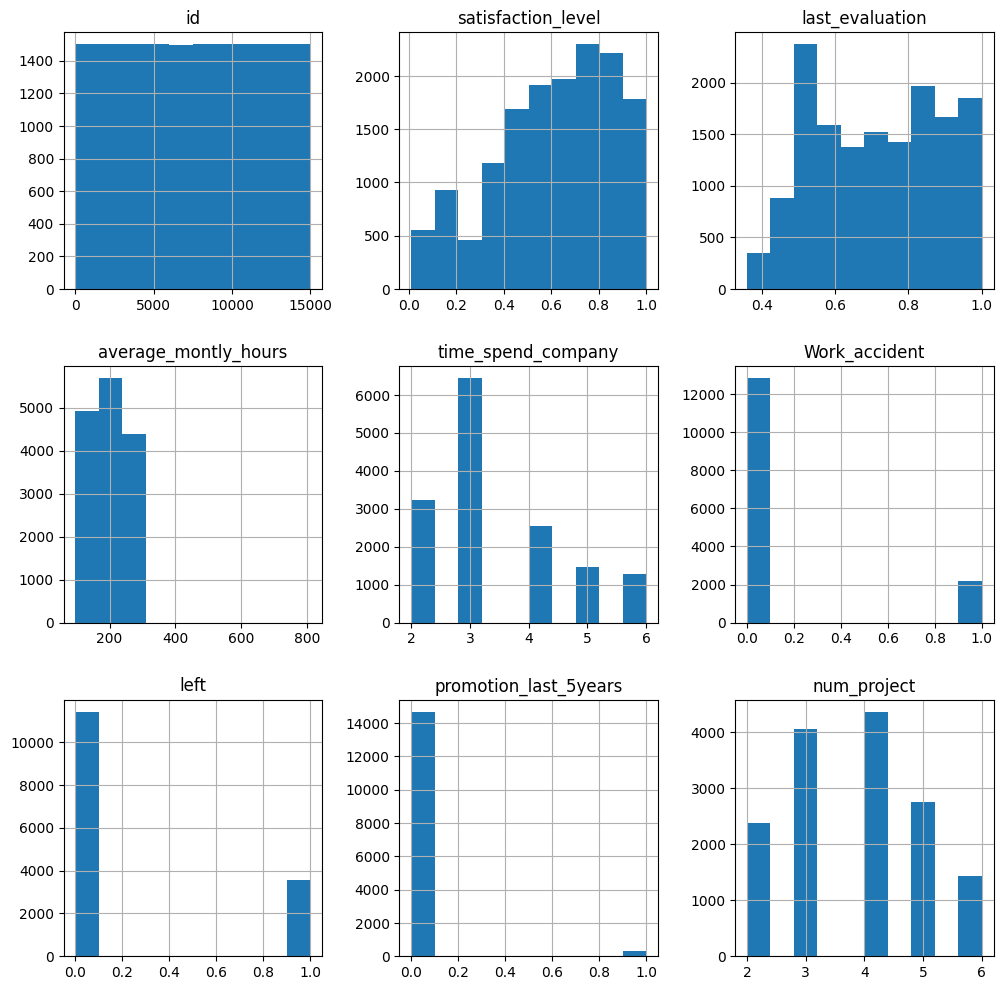

In [53]:
#fazer histograma de todas as variáveis de uma vez:.

df.hist(figsize=(12, 12))

**OBS: AS VARIÁVEIS PARECEM TER COMPORTAMENTOS BEM DIFERENTES. PRECISA NORMALIZAR? COMO REPRESENTAR VARIÁVEIS BINÁRIAS EM GRÁFICOS?**

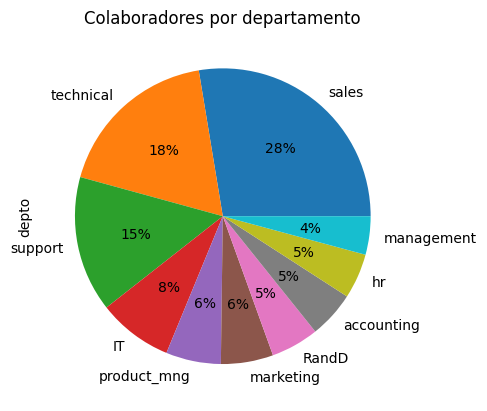

In [54]:
df["depto"].value_counts().plot(kind="pie", autopct="%1.0f%%")
plt.title("Colaboradores por departamento")
plt.show()

<Axes: xlabel='last_evaluation'>

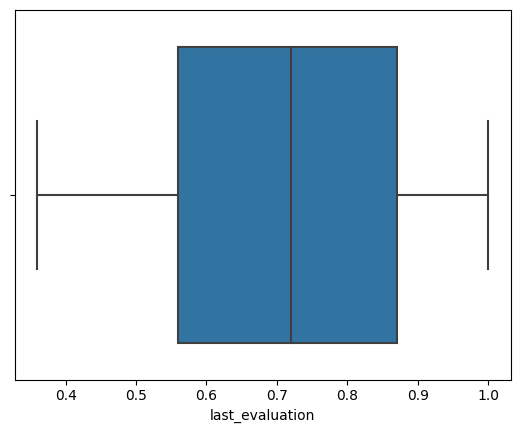

In [55]:
#analisar comportamento da variável last_evaluation:

sns.boxplot(x=df["last_evaluation"])

<Axes: xlabel='last_evaluation', ylabel='Count'>

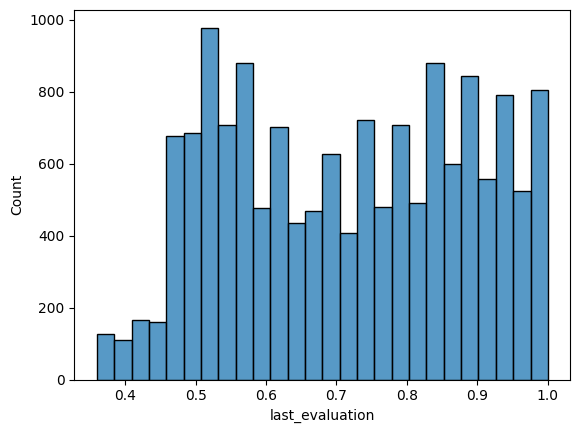

In [56]:
sns.histplot(data=df, x="last_evaluation")

In [57]:
px.violin(df, y="salary", x="time_spend_company", color="left", box=True, points="all")

**OBS: LEFT=0,** estou considerando que as pessoas não sairam da empresa, assim como work accident=0 é que não houve acidente e promotion=0 é que não foi promovido.

**insights**: o pico de saída das pessoas é, em média, com 3 anos de empresa. Pelo que percebi, o salário não influencia muito a saída nesse caso.

In [58]:
px.violin(df, y="salary", x="depto", color="left", box=True)

**insights**: se analisarmos as pessoas que saíram por departamento, há mais saídas em sales, support e IT concentrada em pessoas com salários baixos. Management mostra que os gerentes que ficam tem salários mais altos que os demais

In [59]:
px.violin(df, y="last_evaluation", x="depto", box=True)

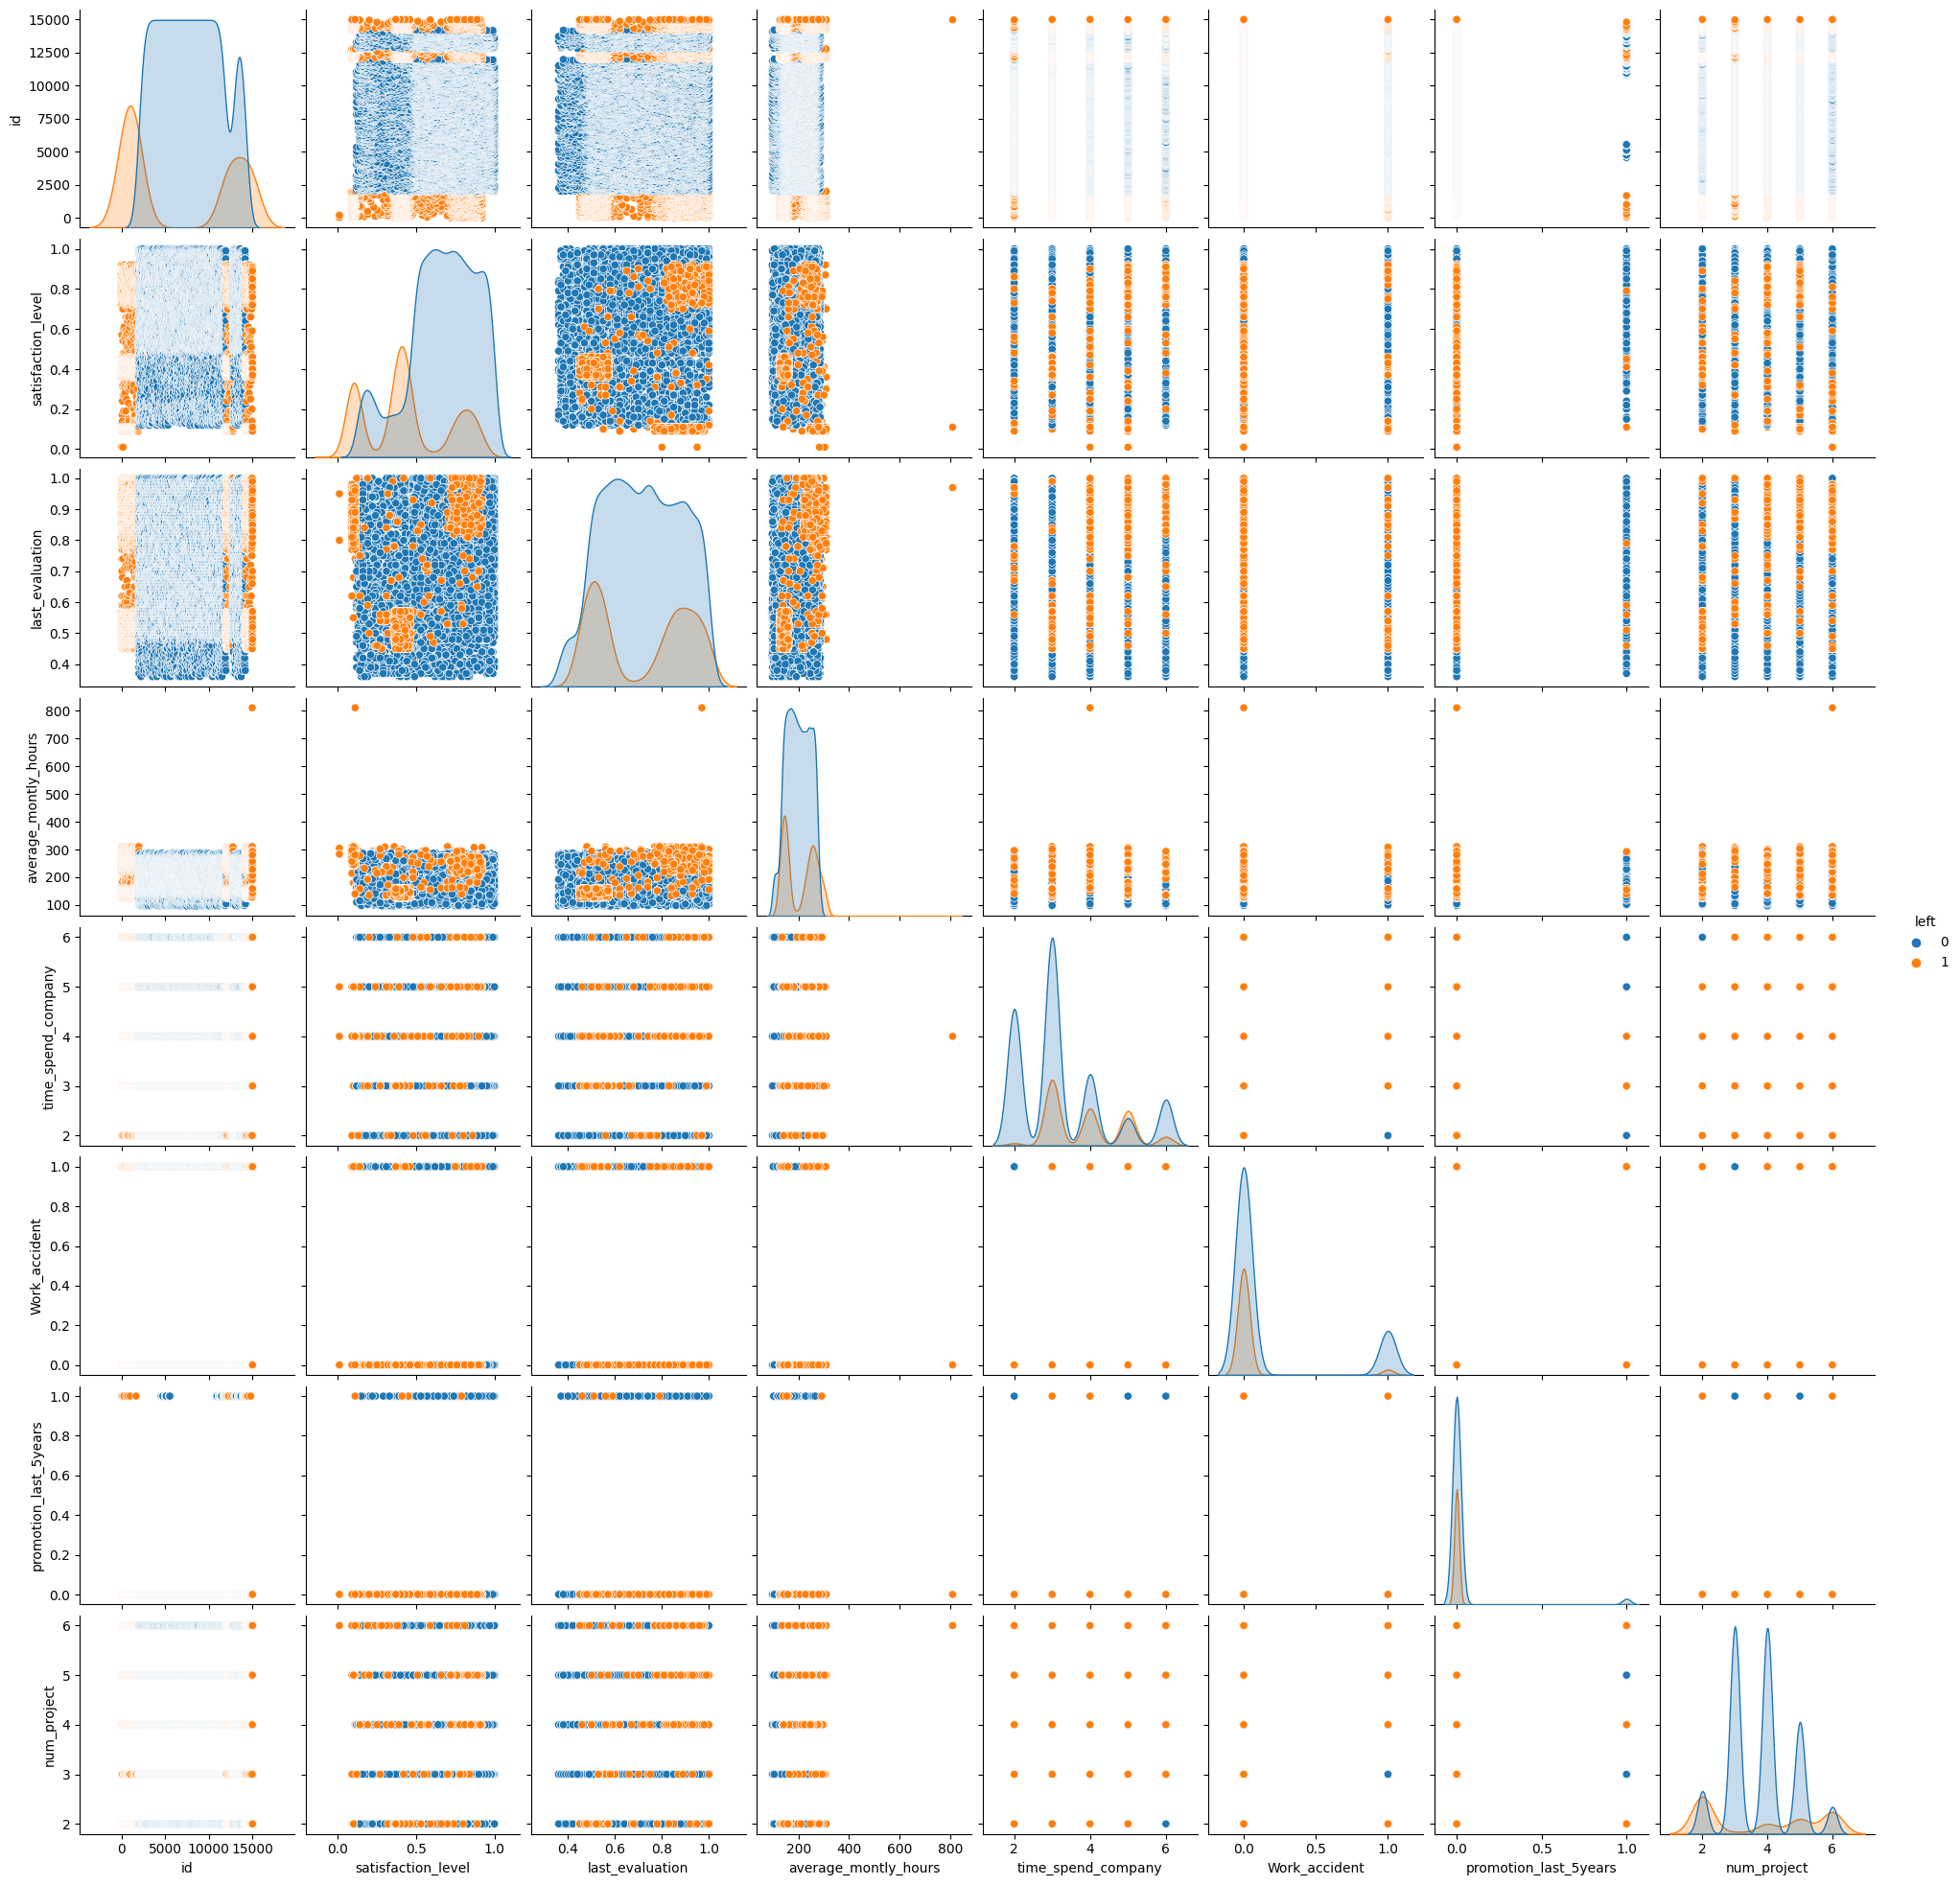

In [60]:
#analisar todas as variáveis com cores diferentes pra left e as relações entre elas:
#gráficos mto legais!

sns.pairplot(df, hue="left")
plt.show()

<Axes: xlabel='depto'>

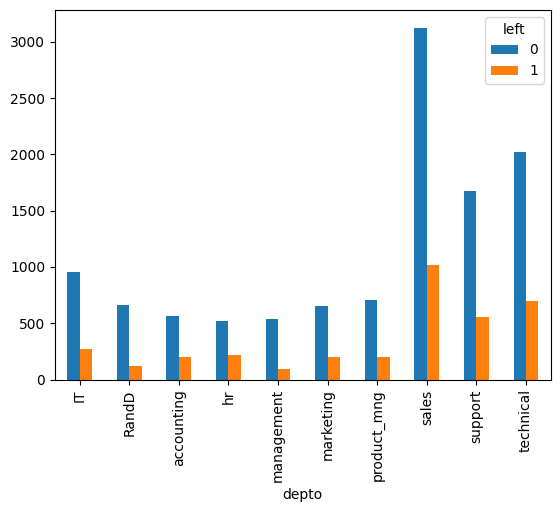

In [61]:
pd.crosstab(df['depto'],df['left']).plot.bar()

<Axes: xlabel='time_spend_company'>

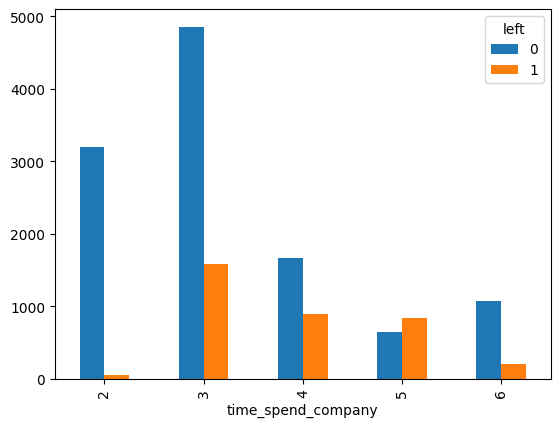

In [62]:
pd.crosstab(df['time_spend_company'],df['left']).plot.bar()

<Axes: xlabel='salary'>

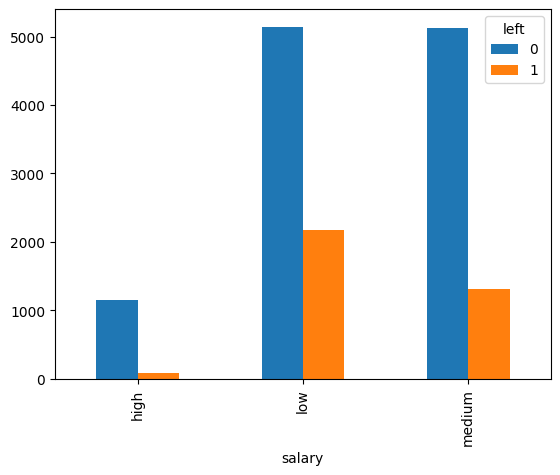

In [63]:
pd.crosstab(df['salary'],df['left']).plot.bar()

<Axes: xlabel='num_project'>

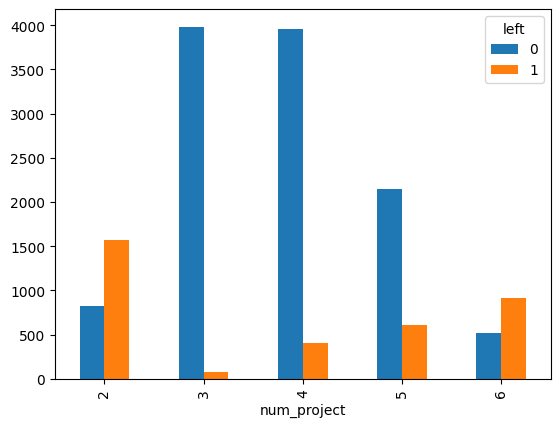

In [64]:
pd.crosstab(df['num_project'],df['left']).plot.bar()

<Axes: xlabel='Work_accident'>

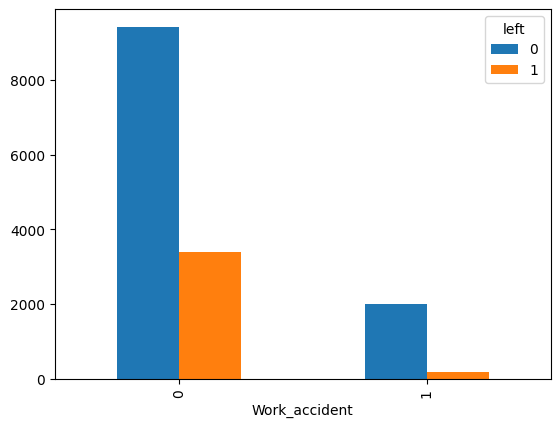

In [65]:
pd.crosstab(df['Work_accident'],df['left']).plot.bar()

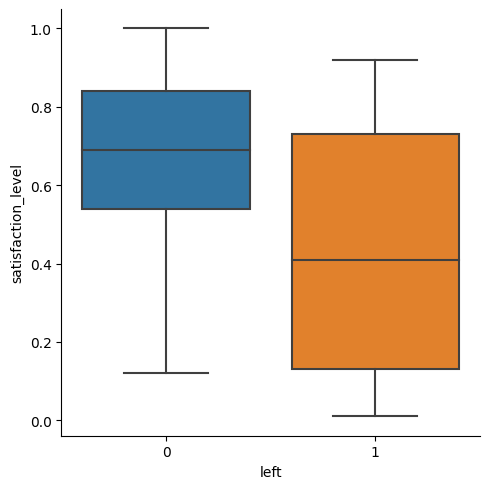

In [66]:
sns.catplot(data=df, x="left", y="satisfaction_level", kind="box")

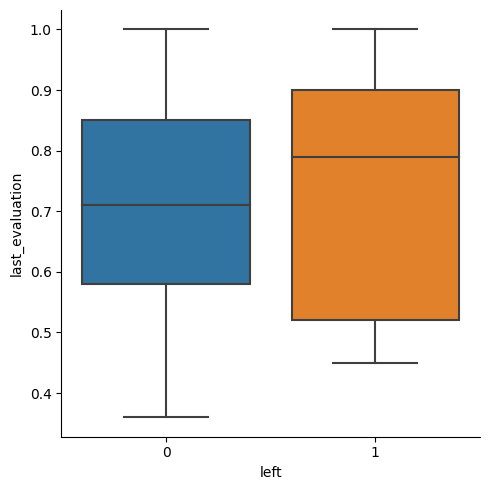

In [67]:
sns.catplot(data=df, x="left", y="last_evaluation", kind="box")

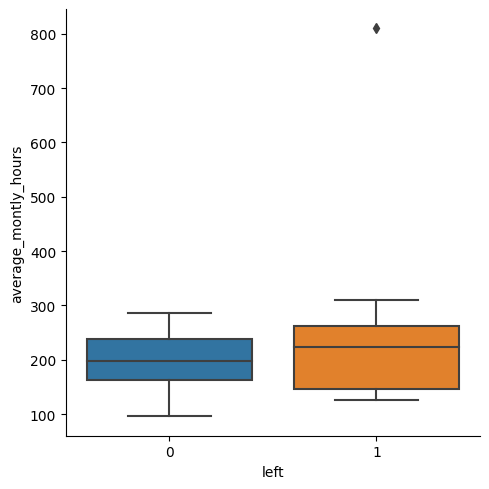

In [68]:
sns.catplot(data=df, x="left", y="average_montly_hours", kind="box")

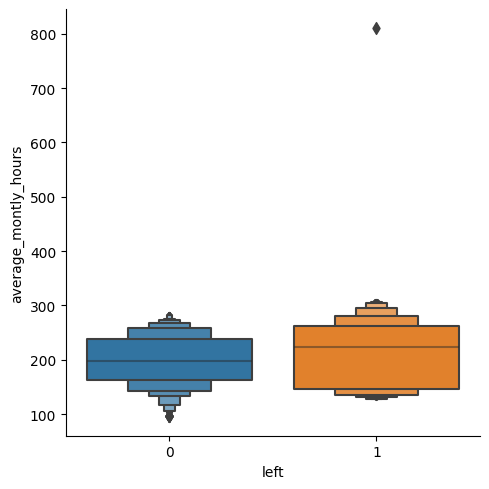

In [69]:
sns.catplot(data=df, x="left", y="average_montly_hours", kind="boxen")

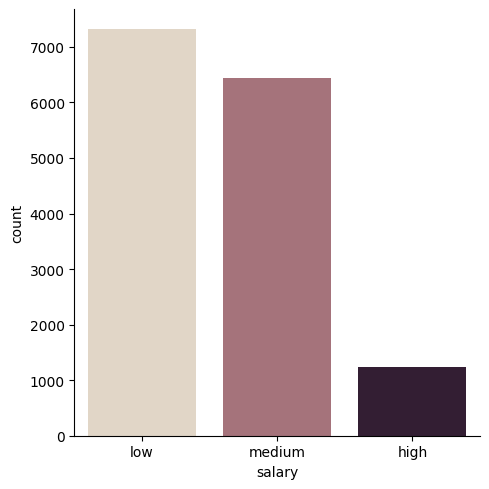

In [70]:
sns.catplot(data=df, x="salary", kind="count", palette="ch:.25")

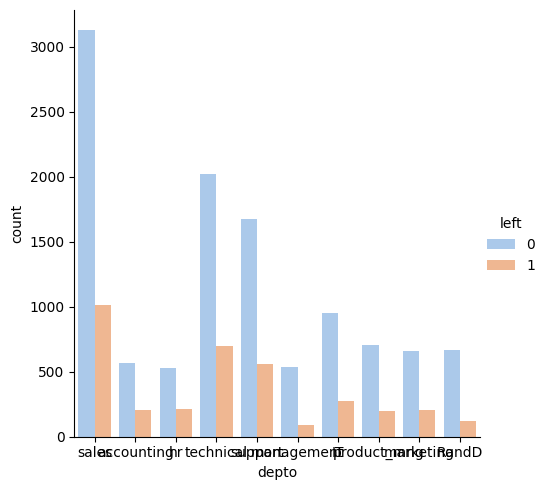

In [71]:
sns.catplot(data=df, x="depto", hue="left", kind="count", palette="pastel")

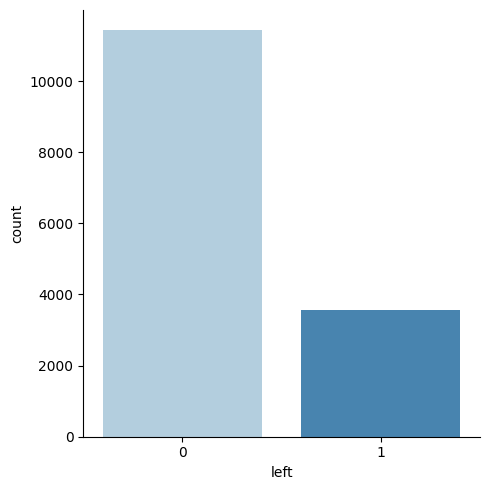

In [72]:
sns.catplot(data=df, x="left", kind="count", palette="Blues")

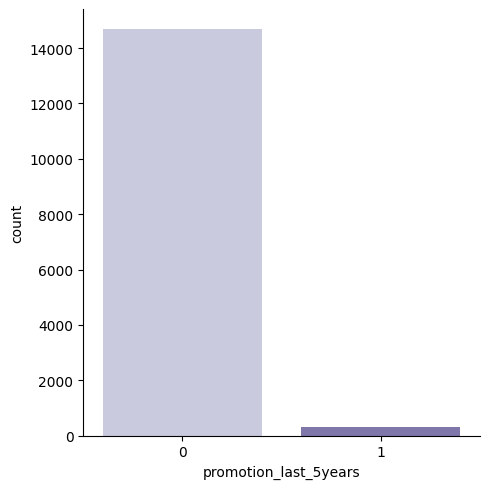

In [73]:
sns.catplot(data=df, x="promotion_last_5years", kind="count", palette="Purples")

#3. Feature Engineering / Correlação




In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<ipython-input-75-ce25b94af65a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

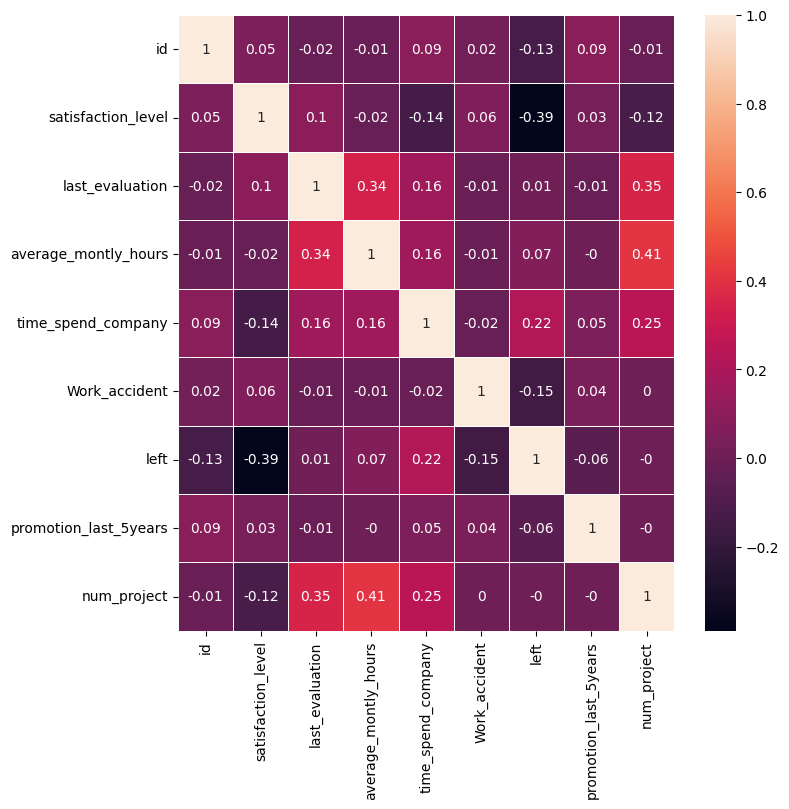

In [75]:
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [76]:
df.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.53,157,3,0,1,0,low,2,sales
1,2,0.80,0.86,262,6,0,1,0,medium,5,sales
2,3,0.11,0.88,272,4,0,1,0,medium,6,sales
3,4,0.72,0.87,223,5,0,1,0,low,5,sales
4,5,0.37,0.52,159,3,0,1,0,low,2,sales


In [77]:
#transformar variáveis str em num. Variáveis com mais opções (não binárias):

dummy_salary = pd.get_dummies(df["salary"], prefix="dummy")
dummy_depto = pd.get_dummies(df["depto"], prefix="dummy")

#concatenar o nosso dataframe com as variáveis dummy e cria um novo df
df_dummy = pd.concat([df, dummy_salary, dummy_depto], axis=1)

In [78]:
df_dummy

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,...,dummy_IT,dummy_RandD,dummy_accounting,dummy_hr,dummy_management,dummy_marketing,dummy_product_mng,dummy_sales,dummy_support,dummy_technical
0,1,0.38,0.53,157,3,0,1,0,low,2,...,0,0,0,0,0,0,0,1,0,0
1,2,0.80,0.86,262,6,0,1,0,medium,5,...,0,0,0,0,0,0,0,1,0,0
2,3,0.11,0.88,272,4,0,1,0,medium,6,...,0,0,0,0,0,0,0,1,0,0
3,4,0.72,0.87,223,5,0,1,0,low,5,...,0,0,0,0,0,0,0,1,0,0
4,5,0.37,0.52,159,3,0,1,0,low,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,151,3,0,1,0,low,2,...,0,0,0,0,0,0,0,0,1,0
14995,14996,0.37,0.48,160,3,0,1,0,low,2,...,0,0,0,0,0,0,0,0,1,0
14996,14997,0.37,0.53,143,3,0,1,0,low,2,...,0,0,0,0,0,0,0,0,1,0
14997,14998,0.11,0.96,280,4,0,1,0,low,6,...,0,0,0,0,0,0,0,0,1,0


hot encoding cria novas colunas com as variáveis que precisamos, que são de texto, mas não são só binários

In [79]:
#dropar colunas q não serão necessárias:

df_dummy.drop(["salary", "depto"], axis=1, inplace=True)

<Axes: >

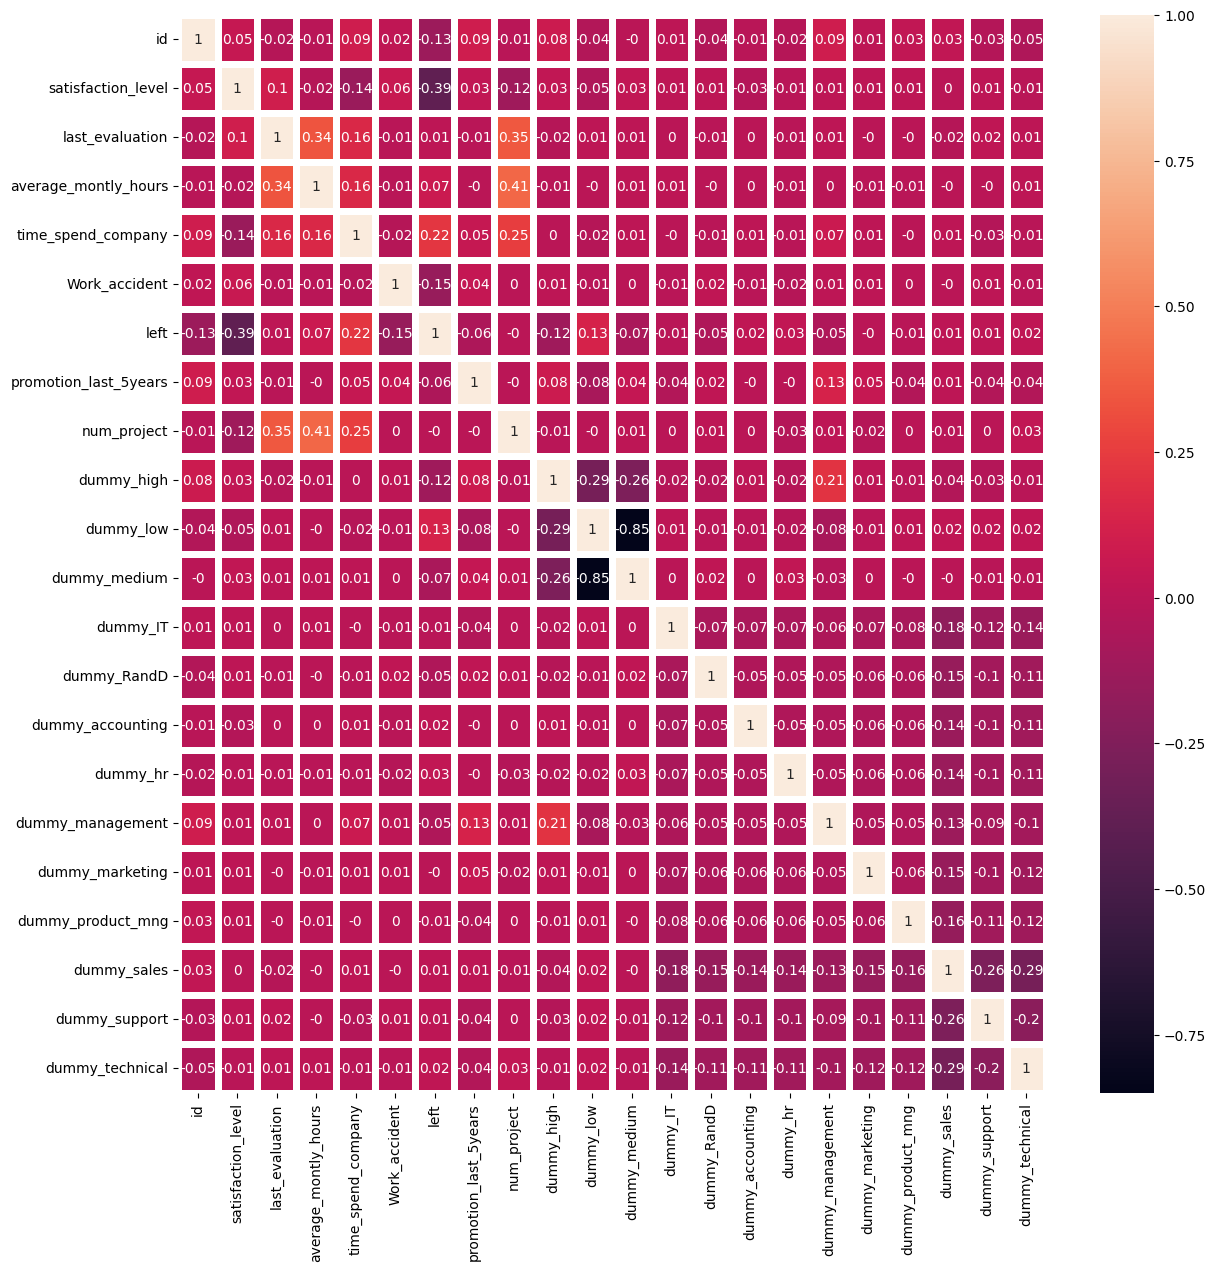

In [80]:
#outra correlation matrix com os dados dummy:
correlation_matriz = df_dummy.corr().round(2)

fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

#4. Modelos de Classificação e Validações

**Classificar a possibilidade de a pessoa sair ou não da empresa com base em algumas variáveis.**

Pela matriz de correlação, as variáveis que podem influenciar a saída do funcionário (left) são:

*dummy_low (salário baixo)

*time_spend_company

*satisfaction_level

Porém, outras variáveis têm correlações entre si, por isso vou escolher também:

*last_evaluation

*average_monthly_hours

*num_project

Para analisar salários como um todo, vou também colocar:

*dummy_medium

*dummy_high

Parece que os departamentos separados não tem muita influência no todo, com exceção de **Management x dummy_high**, por isso não usarei nenhum nesse modelo.


##Modelos KNN e SVM

In [82]:
#separar variáveis características e variável preditiva:

x = df_dummy[["dummy_low", "dummy_high", "dummy_medium", "time_spend_company", "satisfaction_level", "last_evaluation", "average_montly_hours", "num_project"]]
y = df_dummy["left"]

**MODELO KNN**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [85]:
#ver a variável x pra saber se tem a msm escala ou não. Nesse caso, não tem, precisamos padronizar.
x

,dummy_low,dummy_high,dummy_medium,time_spend_company,satisfaction_level,last_evaluation,average_montly_hours,num_project
0,1,0,0,3,0.38,0.53,157,2
1,0,0,1,6,0.80,0.86,262,5
2,0,0,1,4,0.11,0.88,272,6
3,1,0,0,5,0.72,0.87,223,5
4,1,0,0,3,0.37,0.52,159,2
...,...,...,...,...,...,...,...,...
14994,1,0,0,3,0.40,0.57,151,2
14995,1,0,0,3,0.37,0.48,160,2
14996,1,0,0,3,0.37,0.53,143,2
14997,1,0,0,4,0.11,0.96,280,6


In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [87]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [88]:
import numpy as np

In [89]:
#cálculo de diferença de erro pra achar um range de "k" mais adequados:
#cria lista e função pra saber qual k é melhor:

error = []
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_escalonado, y_train)
  pred_i = knn.predict(x_test_escalonado)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'erro médio')

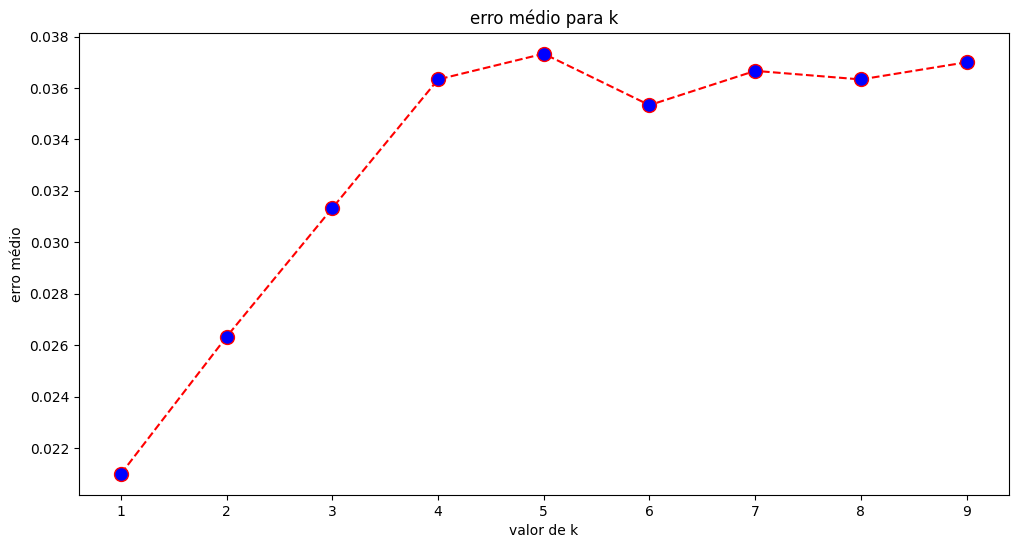

In [90]:
#criar gráfico pra ver essa função acima e escolher o valor melhor de k:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("erro médio para k")
plt.xlabel("valor de k")
plt.ylabel("erro médio")

**insights**: esse gráfico é feito pra encontrar o melhor valor de k, nesse caso, qto menor o erro, melhor, logo, poderíamos usar o número de neighbors 1, 2 e 3. É melhor usar 3 pq não faz mto sentido usar um vizinho só pra analisar e idealmente é melhor usar números ímpares pra não ter impate.

In [91]:
#criar modelo KNN com o k escolhido (3):

modelo_classificador = KNeighborsClassifier(n_neighbors=3)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
#avaliando o modelo:

print(accuracy_score(y_test, y_predito))

0.9686666666666667


**O KNN conseguiu prever a saída de um funcionário da empresa com accuracy de 96%.**

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report #métricas de avaliação
import warnings #remoção de avisos

Text(70.72222222222221, 0.5, 'Dados Reais')

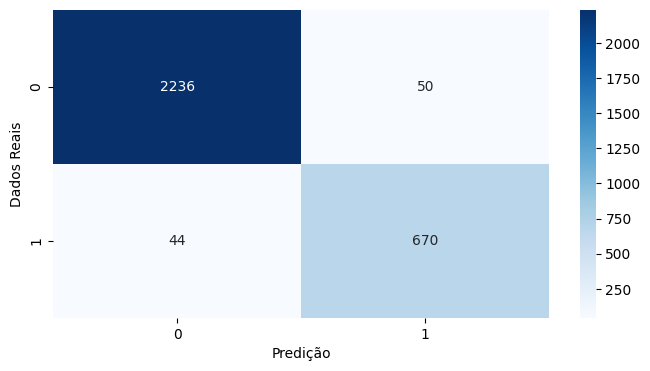

In [133]:
#MATRIZ DE CONFUSÃO DO KNN:
matriz_confusao = confusion_matrix(y_test, y_predito)
plt.figure(figsize=(8, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predição")
plt.ylabel("Dados Reais")

**interpretação:** : Modelo KNN acertou 2236 pessoas que não sairiam da empresa. Classificou 44 pessoas como "não sair", que acabaram saindo. Ele também acertou as 670 pessoas que sairam, e classificou 50 pessoas como "sair", mas que não saíram da empresa.

In [137]:
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



**MODELO SVM**

In [94]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [95]:
#criando modelo SVM:

SVM = Pipeline(
    [
        ("Linear_svc", LinearSVC(C=1))
    ]
  )

In [96]:
#treinando o SVM:

SVM.fit(x_train_escalonado, y_train)

Pipeline(steps=[('Linear_svc', LinearSVC(C=1))])

In [97]:
y_predito_svm = SVM.predict(x_test_escalonado)

In [98]:
print(accuracy_score(y_test, y_predito_svm))

0.7703333333333333


**O SVM conseguiu prever a saída de um funcionário da empresa com 77% de acurácia.**

Text(70.72222222222221, 0.5, 'Dados Reais')

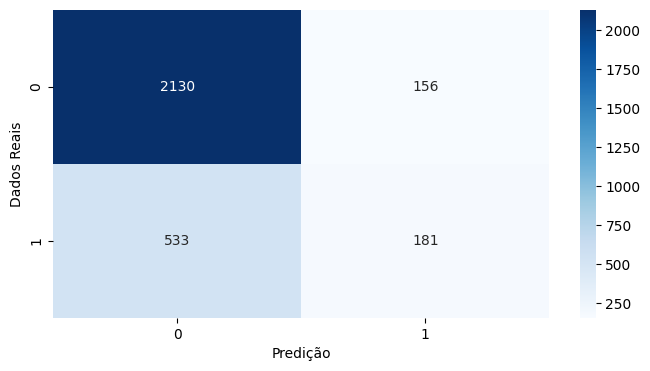

In [134]:
#MATRIZ DE CONFUSÃO DO SVM:
matriz_confusao = confusion_matrix(y_test, y_predito_svm)
plt.figure(figsize=(8, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predição")
plt.ylabel("Dados Reais")

In [139]:
print(classification_report(y_test, y_predito_svm))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2286
           1       0.54      0.25      0.34       714

    accuracy                           0.77      3000
   macro avg       0.67      0.59      0.60      3000
weighted avg       0.74      0.77      0.74      3000



**Resultado: O KNN conseguiu prever com acurácia maior a saída de um funcionário da empresa. Além disso, as métricas do SVM pra pessoas que sairam da empresa (1) foram bem baixas. A matriz de confusão ficou diferente pra esse modelo, a única de todos os modelos que não mostra os acertos na diagonal.**

##Modelos baseados em árvore

**DECISION TREE**

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [99]:
#Separando os dados
x_dt = df_dummy.drop(columns=['left'])
y_dt = df_dummy['left'] #O que eu quero prever. (Target)

In [100]:
#Separando em bases de treino e teste
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt, y_dt, test_size=0.2, stratify=y, random_state=7)

In [112]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth = 3)

In [113]:
dt.fit(x_train_dt, y_train_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

In [114]:
y_predito_dt = dt.predict(x_test_dt)

[Text(0.3333333333333333, 0.875, 'x[0] <= 2000.5\nentropy = 0.792\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 1614\nvalue = [0, 1614]'),
 Text(0.5, 0.625, 'x[0] <= 12000.5\nentropy = 0.528\nsamples = 10385\nvalue = [9142, 1243]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 7998\nvalue = [7998, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 14211.5\nentropy = 0.999\nsamples = 2387\nvalue = [1144, 1243]'),
 Text(0.5, 0.125, 'entropy = 0.933\nsamples = 1758\nvalue = [1144, 614]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 629\nvalue = [0, 629]')]

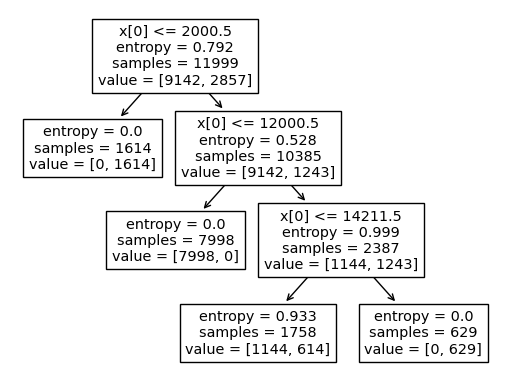

In [115]:
#plotar a árvore de decisão:
tree.plot_tree(dt)

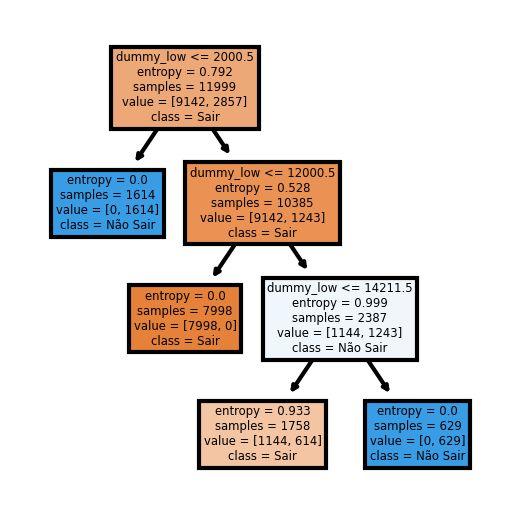

In [130]:
#colocar algumas infos pra gerar a msm árvore de cima, mas com maior entendimento:
class_names = ['Sair', 'Não Sair']
label_names = ['dummy_low', 'time_spend_company',	'satisfaction_level',	'last_evaluation',	'average_montly_hours',	'num_project',	'dummy_medium', "dummy_high"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

tree.plot_tree(dt,
               feature_names = label_names,
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

In [117]:
print(accuracy_score(y_test_dt, y_predito_dt))

0.9436666666666667


**Modelo Decision Tree consegue prever com 94% de acurácia a chance de um funcionário sair da empresa.**

Text(70.72222222222221, 0.5, 'Dados Reais')

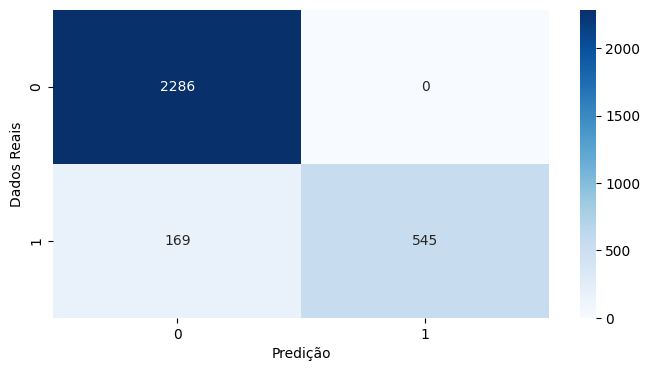

In [135]:
#MATRIZ DE CONFUSÃO DO KNN:
matriz_confusao = confusion_matrix(y_test_dt, y_predito_dt)
plt.figure(figsize=(8, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predição")
plt.ylabel("Dados Reais")

**interpretação:** Modelo Decision Tree acertou 2286 pessoas que não sairiam da empresa. Classificou 169 pessoas como "não sair", que acabaram saindo. Ele também acertou 545 pessoas que sairam, e classificou 0 pessoas como "sair", mas que não saíram da empresa.

In [140]:
print(classification_report(y_test_dt, y_predito_dt))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2286
           1       1.00      0.76      0.87       714

    accuracy                           0.94      3000
   macro avg       0.97      0.88      0.92      3000
weighted avg       0.95      0.94      0.94      3000



**interpretação:** será que esse recall e precision de 1 podem indicar overfitting? A previsão das pessoas que não sairam da empresa está com valores bem altos, mas para as pessoas que sairam está mais baixa.

**RANDOM FOREST**

In [124]:
#modelo mais robusto, custo computacional maior do q árvore comum (decision tree):

rf = RandomForestClassifier(n_estimators=5, max_depth = 3,  random_state=7)

rf.fit(x_train_dt, y_train_dt)

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=7)

In [125]:
estimator = rf.estimators_


In [126]:
y_predito_random_forest = rf.predict(x_test_dt)


In [127]:
print(accuracy_score(y_test_dt, y_predito_random_forest))

0.913


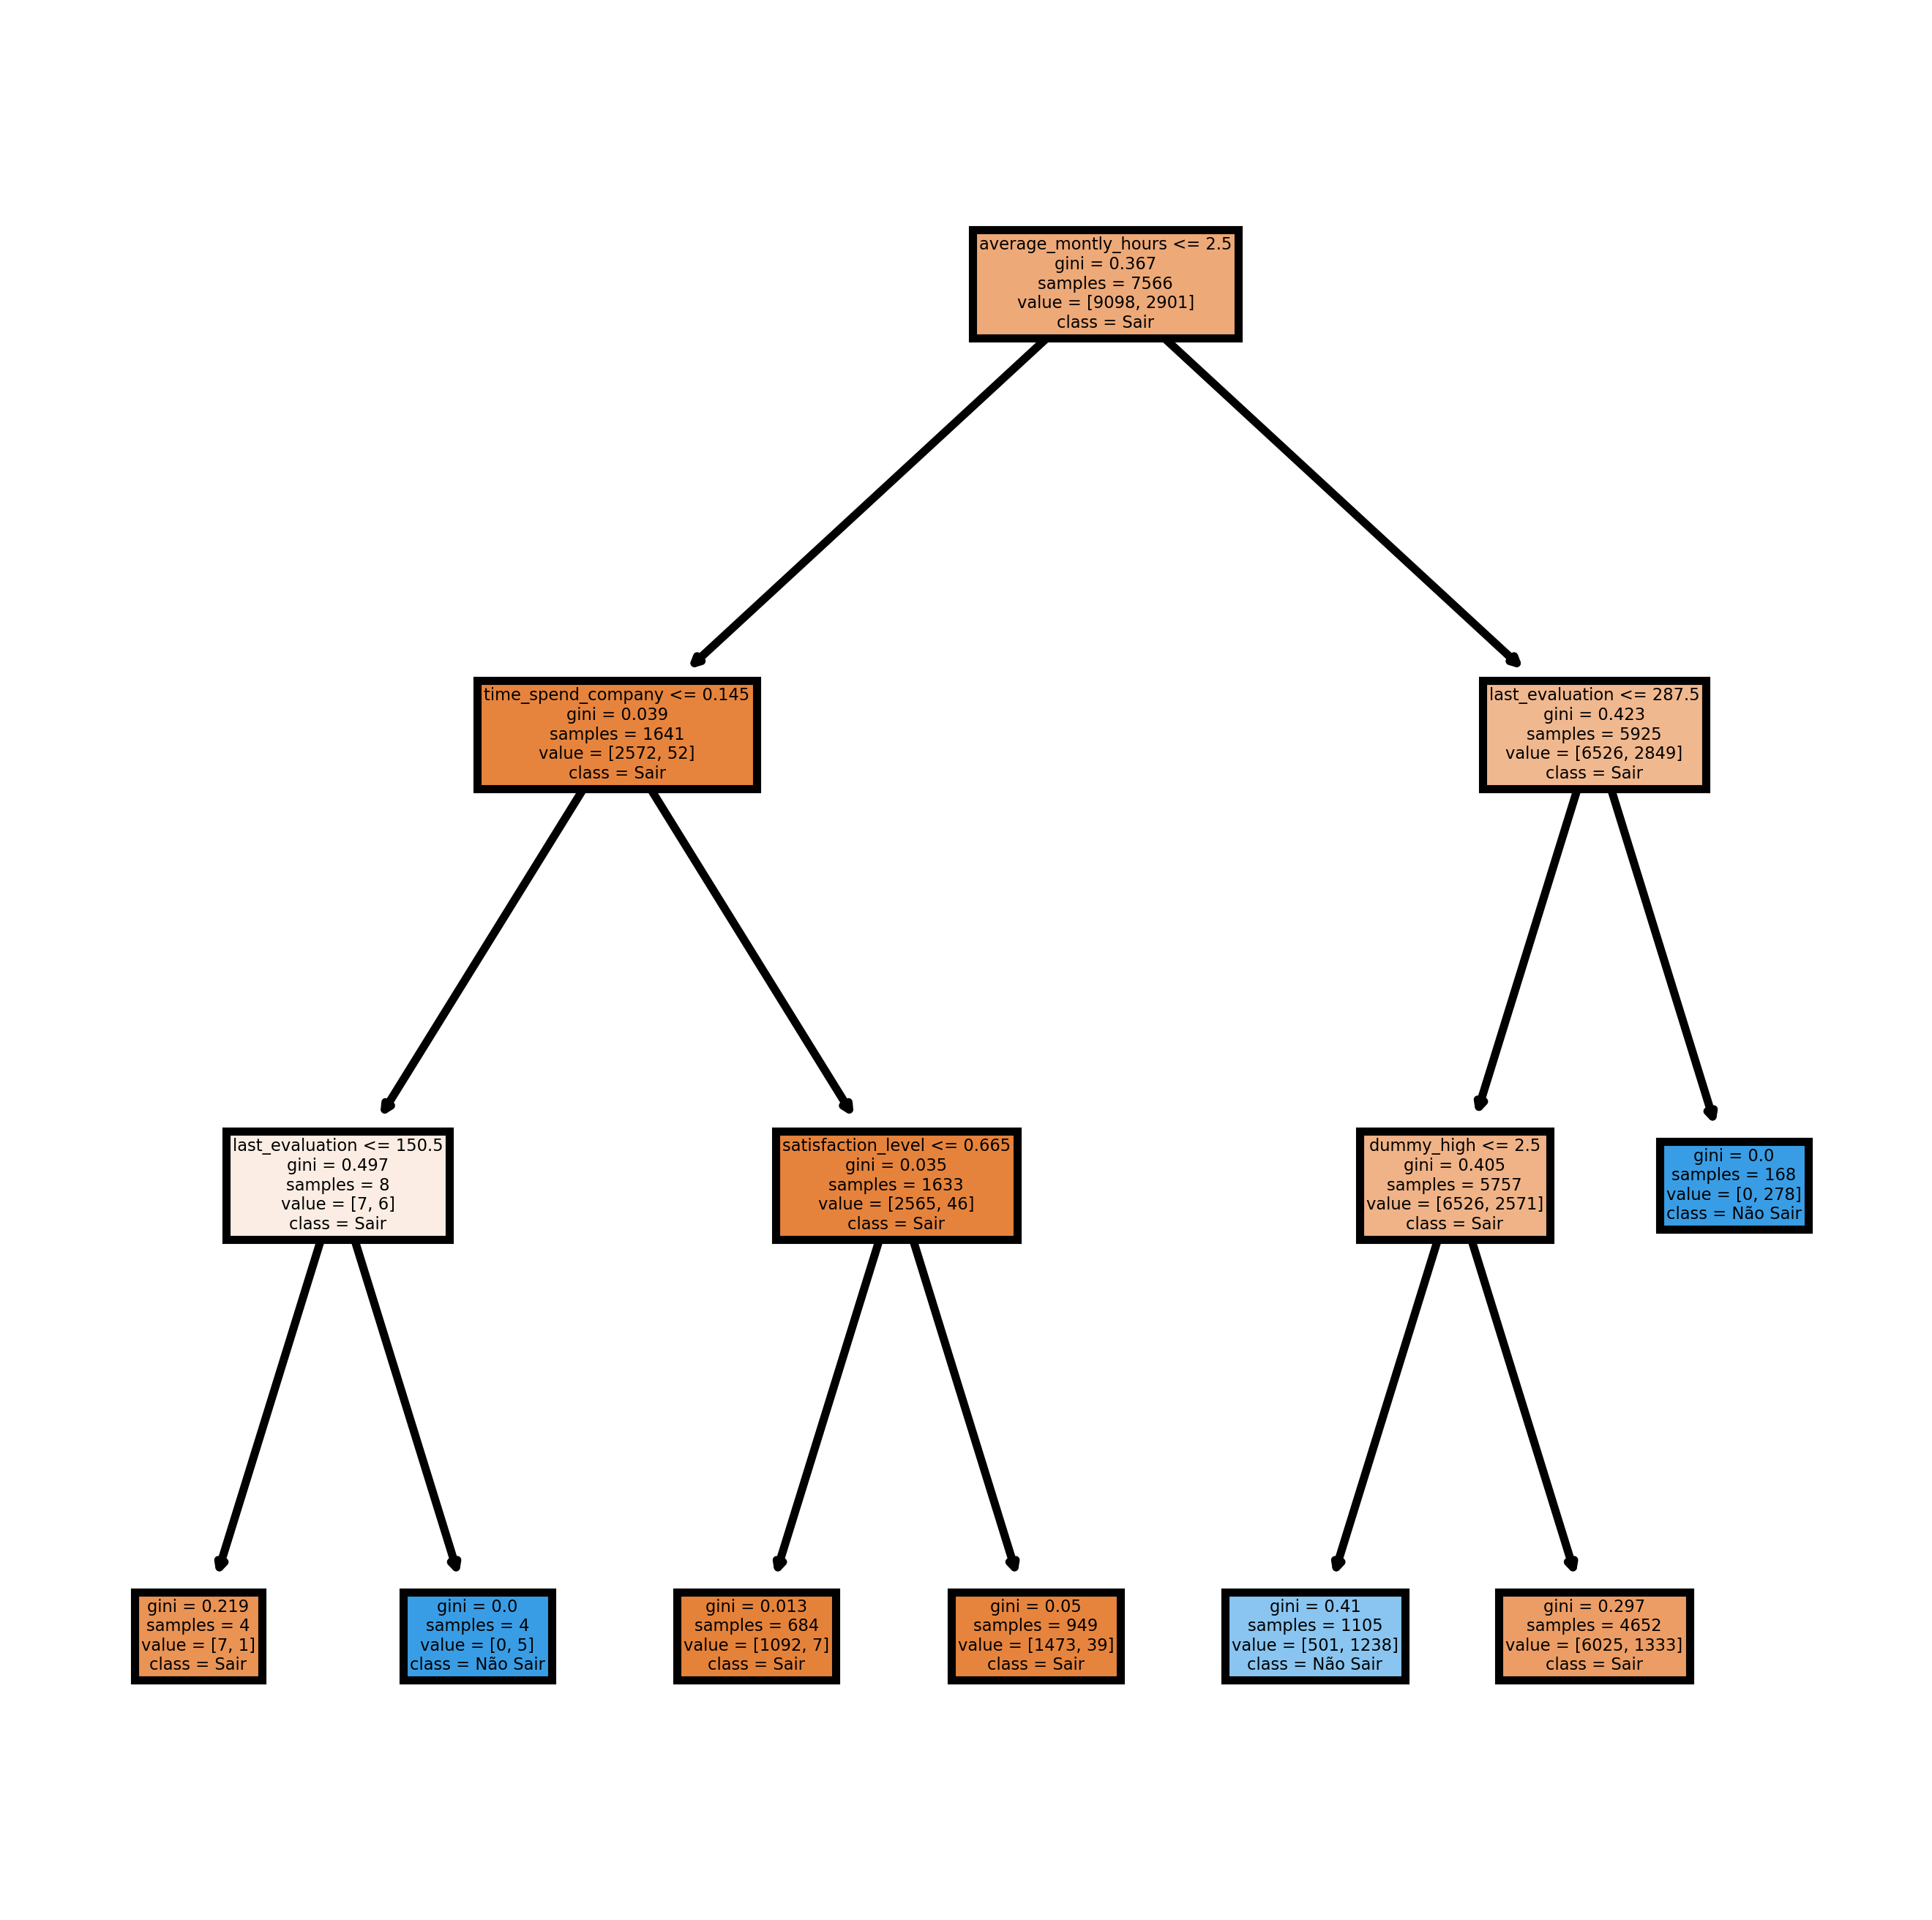

In [128]:
#plotar árvores geradas
class_names = ['Sair', 'Não Sair']
label_names = ['dummy_low', 'time_spend_company',	'satisfaction_level',	'last_evaluation',	'average_montly_hours',	'num_project',	'dummy_medium', "dummy_high"]


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = label_names,
               class_names=class_names,
               filled = True);
fig.savefig('rf_individualtree.png')

**Modelo Random Forest conseguiu prever com 91% de acurácia se o funcionário sairá da empresa.**

Text(70.72222222222221, 0.5, 'Dados Reais')

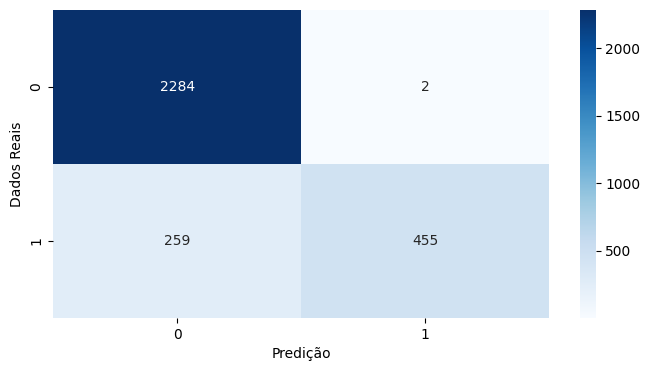

In [136]:
#MATRIZ DE CONFUSÃO DO KNN:
matriz_confusao = confusion_matrix(y_test_dt, y_predito_random_forest)
plt.figure(figsize=(8, 4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predição")
plt.ylabel("Dados Reais")

**interpretação:** Modelo Random Forest acertou 2284 pessoas que não sairiam da empresa. Classificou 259 pessoas como "não sair", que acabaram saindo. Ele também acertou 455 pessoas que sairam, e classificou 2 pessoas como "sair", mas que não saíram da empresa.

In [141]:
print(classification_report(y_test_dt, y_predito_random_forest))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2286
           1       1.00      0.64      0.78       714

    accuracy                           0.91      3000
   macro avg       0.95      0.82      0.86      3000
weighted avg       0.92      0.91      0.91      3000



**interpretação:** será que esse recall e precision de 1 podem indicar overfitting? A previsão das pessoas que não sairam da empresa está com valores bem altos, mas para as pessoas que sairam está mais baixa.

**Resultado: Apesar de a acurácia do Decision Tree ter sido maior, acho que o Random Forest analisou mais variáveis, enquanto que o Decision Tree analisou somente salário.**